# Project: Exploring weather patterns

## Table of Contents
<ul>
<li><a href="#intro">A. Introduction</a></li>
<li><a href="#wrangling">B. Data Wrangling</a></li>
<li><a href="#eda">C. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">D. Conclusions</a></li>
</ul>

<a id='intro'></a>
## A. Introduction

### Data Analysis Nanodegree: Project 1 - Explore weather patterns

This project is completed as part of the 'Data Analyst' nanodegree with Udacity. 

The goal of the project is to analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

**This project requires the following steps:**

1. Extract data from a database using a SQL query
2. Calculate a moving average in a spreadsheet or pandas
3. Create a line chart in a spreadsheet or pandas


### Data

Data needed to be extracted from a SQL database supplied by Udacity, using SQL queries of choice.
It's part of the project deliverables to figure out the right SQL statement to download the data  

**There were three tables in the database:**
1. city_list - This contains a list of cities and countries in the database. Look through them in order to find the city nearest to you.
2. city_data - This contains the average temperatures for each city by year (ºC).
3. global_data - This contains the average global temperatures by year (ºC).


### Decisions made

- **United Kingdom, Birmingham** were chosen as the local city closest to me
- **Pandas** were chosen to analyse the data instead of spreadsheets to strengthen python knowledge.

Final SQL query used to extract the data:

`
SELECT g.year AS year,
       g.avg_temp AS global_avg_temp, 
       c.avg_temp AS uk_birmingham_avg_temp
  FROM global_data AS g
       FULL OUTER JOIN city_data AS c
       ON c.year = g.year
 WHERE c.country = 'United Kingdom' 
      AND c.city = 'Birmingham' 
      AND c.year >= 1750
ORDER BY g.year
`

### The project will answer the following question:
#### How does the overall global temperate trends differ from the UK Birmingham, my closest city ?

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='white', font_scale=1)

# suppress matplotlib user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

<a id='wrangling'></a>
## B. Data Wrangling


### General Properties

In [2]:
# Load data extracted from SQL database
df_weather = pd.read_csv('../data/weather_data.csv')
df_weather.head()

,year,global_avg_temp,uk_birminghamp_avg_temp
0,1750,8.72,9.73
1,1751,7.98,9.51
2,1752,5.78,6.26
3,1753,8.39,8.97
4,1754,8.47,8.82


In [3]:
# how many rows and columns does the dataset have ?
df_weather.shape

(264, 3)

In [4]:
# which datatypes does the dataset have, and how many missing values can be observed ?
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     264 non-null    int64  
 1   global_avg_temp          264 non-null    float64
 2   uk_birminghamp_avg_temp  264 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.3 KB


There are no missing values. Year field should be converted to datetime and indexed to make use of pandas build in time series analysis

In [5]:
# how manu unique values does each column of the dataset have ?
df_weather.nunique()

year                       264
global_avg_temp            145
uk_birminghamp_avg_temp    157
dtype: int64

In [6]:
# Are any rows duplicated ?
df_weather.duplicated().sum()

0

No data seems to be duplicated

### Data Cleaning 

During accessing step, the following cleaning steps were identified:

- Convert year to datetime format and set it as index for time series analysis

In [7]:
df_weather['year'] = pd.to_datetime(df_weather['year'], format='%Y', errors='coerce').dt.date.astype('datetime64')
df_weather.dtypes

year                       datetime64[ns]
global_avg_temp                   float64
uk_birminghamp_avg_temp           float64
dtype: object

In [8]:
df_weather.head()

,year,global_avg_temp,uk_birminghamp_avg_temp
0,1750-01-01,8.72,9.73
1,1751-01-01,7.98,9.51
2,1752-01-01,5.78,6.26
3,1753-01-01,8.39,8.97
4,1754-01-01,8.47,8.82


In [9]:
df_weather.set_index('year', inplace=True) 
df_weather.head()

,global_avg_temp,uk_birminghamp_avg_temp
year,,
1750-01-01,8.72,9.73
1751-01-01,7.98,9.51
1752-01-01,5.78,6.26
1753-01-01,8.39,8.97
1754-01-01,8.47,8.82


<a id='eda'></a>
## C. Exploratory Data Analysis


In [10]:
df_weather.describe()

,global_avg_temp,uk_birminghamp_avg_temp
count,264.000000,264.000000
mean,8.359394,9.010038
std,0.575184,0.629131
min,5.780000,6.260000
25%,8.077500,8.627500
50%,8.365000,8.995000
75%,8.700000,9.400000
max,9.730000,10.630000


**Observations:**
UK Birmingham have higher average temperatures than global by 0.6%

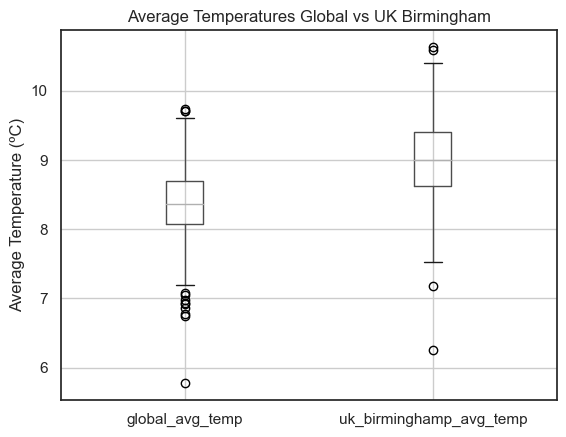

In [11]:
# plot outliers with boxplot
df_weather.boxplot()
plt.ylabel('Average Temperature (ºC)')
plt.title('Average Temperatures Global vs UK Birmingham')
plt.show()

**Observations:**
- Box plot highlight again the average temperatures in UK Birmingham are higher
- Globally, we observe the most outliers below 7ºC

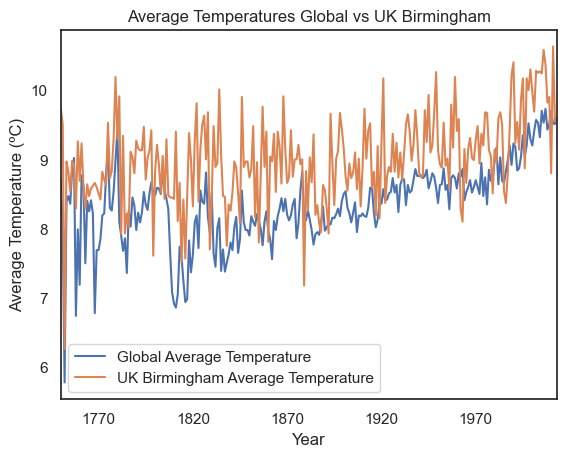

In [12]:
# plot the timeseries data
df_weather.plot()
plt.legend(['Global Average Temperature', 'UK Birmingham Average Temperature'])
plt.ylabel('Average Temperature (ºC)')
plt.xlabel('Year')
plt.title('Average Temperatures Global vs UK Birmingham')
plt.show()

**Observations:** 
- UK Birmingham have higher temperatures than global.
- UK temperates seems to fluctuate a lot more

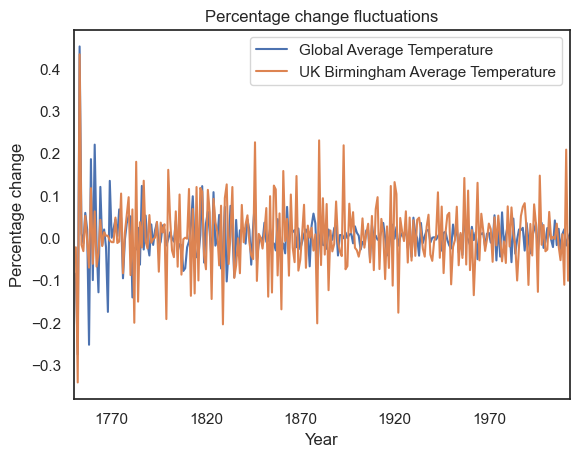

In [13]:
# plot percentage change time series to observe fluctuations better
df_weather.pct_change().plot()
plt.legend(['Global Average Temperature', 'UK Birmingham Average Temperature'])
plt.ylabel('Percentage change')
plt.xlabel('Year')
plt.title('Percentage change fluctuations')
plt.show()

**Observations:** UK Birmingham average temperatures seems to fluctuate a lot more than global temperatures

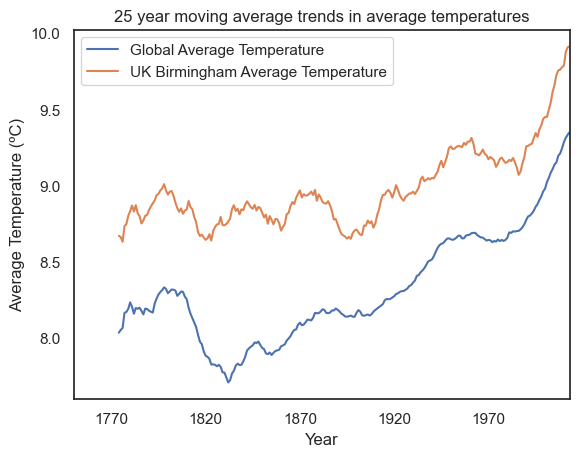

In [14]:
# Using moving average for rolling 25 years, smooth out yearly volatility and observe the long term trend
df_weather.rolling(window=25).mean().plot()
plt.legend(['Global Average Temperature', 'UK Birmingham Average Temperature'])
plt.ylabel('Average Temperature (ºC)')
plt.xlabel('Year')
plt.title('25 year moving average trends in average temperatures')
plt.show()

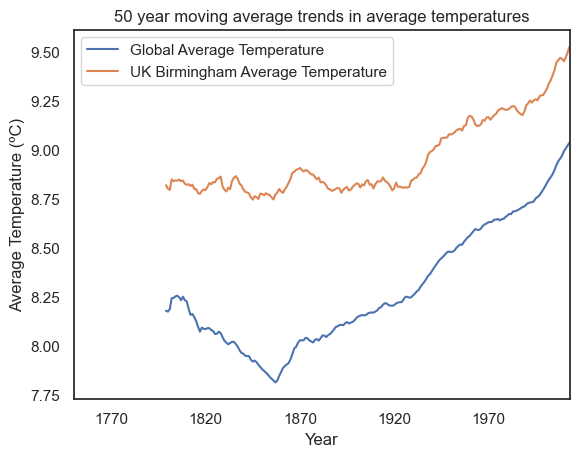

In [15]:
# Using moving average or rolling 50 years, smooth out yearly volatility and observe the long term trend
df_weather.rolling(window=50).mean().plot()
plt.legend(['Global Average Temperature', 'UK Birmingham Average Temperature'])
plt.ylabel('Average Temperature (ºC)')
plt.xlabel('Year')
plt.title('50 year moving average trends in average temperatures')
plt.show()

**Observation:** A better long term trend can be observed using a 50 year rolling average

<a id='conclusions'></a>
## D. Conclusions

The goal of the project was to observe the trend of average temperates locally (the closest city to where I live) vs global average temperates

**UK Birmingham** were chosen as the local city closest to me

**Pandas** were chosen to analyse the data instead of spreadsheets to strengthen python knowledge.

**Moving average** were used to smooth out yearly volatility to observe the long term trend


### D1. Accessing and extracting data

Data was extracted by constructing a SQL statement of choice using the Udacity database provided.
Several SQL queries was used to initially explore the data.

#### Step 1: Explore the list of cities:

`
SELECT * 
FROM city_data
`

- There are 342 cities in the database
- I live in the United Kingdom, and noticed ‘United Kingdom’ entry exist in the database by visual inspection

#### Step 2: Explore city_data 

`
SELECT * 
  FROM city_data 
 WHERE country = 'United Kingdom' 
   AND city = ‘Birmingham’ 
ORDER BY year
`

- Data for 271 years exist, ranging from year 1743 to 2013.  
- Missing values exist in the dataset for years 1746 to 1749.

#### Step 3: Explore global data 

`
SELECT * 
  FROM global_data 
ORDER BY year
`

Global data exist for 266 years, ranging from year 1750 to 2015


#### Step 4: Build the final SQL to extract the data

Final SQL statement that was used to extract the data:

`
SELECT g.year AS year,
       g.avg_temp AS global_avg_temp, 
       c.avg_temp AS uk_birmingham_avg_temp
  FROM global_data AS g
       FULL OUTER JOIN city_data AS c
       ON c.year = g.year
 WHERE c.country = 'United Kingdom' 
      AND c.city = 'Birmingham' 
      AND c.year >= 1750
ORDER BY g.year
`

- Global data start at year 1750, whilst city data for Birmingham start at 1743
- As we have only 3 data points in the city data prior 1750, it would be better to drop records prior 1750
- Global data exist for years 2014 and 2015. These years were not available in the local data and thus ignored.

The data was further inspected using pandas in a jupyter notebook, checking for duplicates, unique values to spot errors in the data. 

### D2. Cleaning
The following cleaning activities were identified and performed:

- Convert year to datetime format and set it as index for time series analysis 

### D3. Exploration and Findings

The cleaned data was first explored using descriptive statistics, displaying time series line charts, box plots to explore outliers and plotting percentage change trends

**General findings**:
- UK Birmingham have higher average temperatures than global by 0.6%
- Using box plots, we observe the most outliers below 7ºC globally
- UK Birmingham average temperatures seems to fluctuate a lot more than global temperatures when plotting percentage change

After exploring the data, the following question were answered through analysis:
#### How does the overall global temperate trends differ from the UK Birmingham, my closest city ?

50 year rolling moving average was used as this give a better long term trend summary

- Overall, both globally and local, we can observe an upward trend. The world is getting hotter.
- The global trends seems to be fairly consistent between 1750 - 1920. After 1920 we observe a steady upwards trend. 
- There was a downwards trend in average temperatures in Birmingham from 1750-1860, whilst the Global trend during the same period were consistent. Birmingham's temperatures during the early 18th century were getting colder.
- There is a steady upwards trend in moving average temperates in Birmingham starting from around 1860, whilst the upward trend in Global started only much later in 1920. Temperates thus started to rise much earlier locally compared to global.
- There seems to be a steeper climb in average temperates in Birmingham compared to global. Birmingham is warming up faster on average per year than Global.
- Birmingham shows more fluctuations in temperature (lots more extreme ups and down from one year to the next) compared global if we look at the percentage change line plot
- On average Birmingham has higher average temperates than global
- In the box plot, we observe the most outliers below the global minimum average temperates, this suggests global averages include a few colder countries.



### D.4 Limitations

To make a more accurate analysis, data at monthly level would be helpful to separately explore seasonal trends

It might be worthwhile to isolate countries with extreme hot or cold weather (e.g. near the equator and poles) as this could influence global averages. Perhaps a better comparison would be countries on same coordinates to compare similar countries.


# References

pandas documentation